# Lesson 2: Scientific Data Formats and Advanced Plotting

Author: Rebekah Esmaili (rebekah.esmaili@gmail.com)
 
---

## Lesson Objectives
* You will learn to:
    * Import relevant packages for scientific programming
    * Read netCDF and GRIB2 data
    * Creating plots and maps
   

![](img/flowchart.png)




## Importing NetCDF files

NetCDF and HDF are self-describing formats, which are structured binary data files and useful for storing other big datasets. Computationally, it is faster to read in binary-based datasets than text, which needs to be parsed before being stored into a computer’s memory. Because the files are more compact, they are cheaper to store large, long-term satellite data. Furthermore, information about the data ("metadata") can be stored inside the file themselves.

Datasets:
* JRR-AOD_v2r3_j01_s202009152044026_e202009152045271_c202009152113150_thinned.nc: A netCDF file that contains Aerosol Optical Depth (AOD) retrieved from a Suomi NPP overpass on 2020 9 Aug.  For this workshop, unused fields were removed.
* gfs_3_20200915_0000_000.grb2: A GRIB2 file that contains GFS analysis
* MOP03JM-201811-L3V95.6.3_thinned.nc: The Nov 2018 CO monthly mean from the Measurement of Pollution in the Troposphere (MOPITT), which is an instrument on the Terra satellite.
    * NOTE: For this tutorial, the file was converted to a netCDF4 file and unused variable fields were removed. The original file is HDF5 MOP03JM-201811-L3V95.6.3.he5 and can be obtained from https://earthdata.nasa.gov/.
*  [NOAA Extended Reconstructed SST version 5 dataset (ERSST)](https://psl.noaa.gov/data/gridded/data.noaa.ersst.v5.html). Shows the global monthly mean ocean surface temperature from 1854-present using data collected from ocean buoys, ships, and climate modeled data.

Many environmental dataset names are quite long. However, the dataset name is encoded to give us information about the contents. For example:

```
JRR-AOD_v2r3_j01_s202009152044026_e202009152045271_c202009152113150.nc
```
You can learn several important features of the dataset without opening it:

* Prefix indicates the mission (JRR, for JPSS Risk Reduction)
* Product (Aerosol Optical Depth, or AOD), algorithm version
* Revision number (v1r1)
* Satellite source (j01 for JPSS-1/NOAA-20)
* Start (s), end (e), and creation (c) time, which are each followed by the year, month, day, hour, minute, and seconds (to one decimal place). 

First, import three commonly used packages in Python:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

To begin, you need to first import [xarray](http://xarray.pydata.org/en/stable/io.html) which is tailored to open netCDF4 files and work with large arrays (like numpy and pandas). The [netCDF4 package](https://unidata.github.io/netcdf4-python/netCDF4/index.html) can also be used to import files.

In [2]:
import xarray as xr

Use the Dataset function to import the above dataset.

In [3]:
fname='data/JRR-AOD_v2r3_j01_s202009152044026_e202009152045271_c202009152113150_thinned.nc'
aod_file_id = xr.open_dataset(fname)

If you print the contents of the file_id variable, you will get a long list of the global attributes, variables, dimensions, and much more.

In [4]:
aod_file_id

<xarray.Dataset>
Dimensions:    (Rows: 768, Columns: 3200)
Coordinates:
    Latitude   (Rows, Columns) float32 ...
    Longitude  (Rows, Columns) float32 ...
Dimensions without coordinates: Rows, Columns
Data variables:
    AOD550     (Rows, Columns) float32 ...
Attributes: (12/39)
    Conventions:                              CF-1.5
    Metadata_Conventions:                     CF-1.5, Unidata Dataset Discove...
    standard_name_vocabulary:                 CF Standard Name Table (version...
    project:                                  JPSS Risk Reduction: Enterprise...
    institution:                              DOC/NOAA/NESDIS/NDE > S-NPP Dat...
    naming_authority:                         gov.noaa.nesdis.nde
    ...                                       ...
    geospatial_first_scanline_last_fov_lon:   -131.32474
    geospatial_last_scanline_first_fov_lon:   -99.63281
    geospatial_last_scanline_last_fov_lon:    -133.76132
    geospatial_lat_units:                     degrees_north
    geospatial_lon_units:                     degrees_east
    geospatial_bounds:                        POLYGON((-99.2562 35.6039,-131....

The output above is worth inspecting. Inside Jupyter Notebooks, xarray allows you to inspect the file contents. Clicking on the arrows will show a preview of the metadata. Note that you can also use tools like [Panoply](https://www.giss.nasa.gov/tools/panoply/) to inspect the contents of the netCDF file outside of Python.

* __Dimensions__: The dimensions are named Rows and Columns, which are respectively 768 and 3200.

* __Coordinates__: The coordinates are Latitude and Longitude. These are both two dimensions.

* __Variables__: This file has only one variable, which is AOD550. It's dimensions are also Rows and Columns.

* __Attributes__: netCDF4 [CF-1.5 conventions](https://cfconventions.org/). Some of the information that we saw in the file name is also present: this product is the *JPSS Risk Reduction Unique Aerosol Optical Depth* (title) *Level 2* product (processing_level) and the data was collected from the *NOAA-20* (satellite_name) *VIIRS* instrument (instrument_name). The *start* (time_coverage_start) and *end* times (time_coverage_end) metadata fields are consistent with the filename. I recommend that you read netCDF file header contents, especially the first time you are working with new data. 

AOD is a unitless measure of the extinction of solar radiation by particles suspended in the atmosphere. High values of AOD can indicate the presence of dust, smoke, or another air pollutant while low values indicate a cleaner atmosphere.

Xarray syntax will resemble both Pandas and Numpy. Unlike numpy, N-D arrays can be labeled. Instead of having to remember indices numbers, we can extract elements using their coordinate or variables names.

Below I'll extract three important variables: AOD550, Latitude, and Longitude:

In [5]:
AOD_550 = aod_file_id['AOD550']
AOD_lat = aod_file_id['Latitude']
AOD_lon = aod_file_id['Longitude']

Let's print AOD_550 below. This variable contains only a portion of the original data array:

In [6]:
AOD_550

<xarray.DataArray 'AOD550' (Rows: 768, Columns: 3200)>
[2457600 values with dtype=float32]
Coordinates:
    Latitude   (Rows, Columns) float32 ...
    Longitude  (Rows, Columns) float32 ...
Dimensions without coordinates: Rows, Columns
Attributes:
    long_name:    Aerosol optical depth at 550 nm
    units:        1
    valid_range:  [-0.05  5.  ]

Xarray uses NumPy as a dependency so so we can use numpy functions like *.mean()*. First we have to make sure it's in the right format. If you check the type of *AOD_550*, you can see it's a *numpy.ndarray.*

In [7]:
type(AOD_550.values)

numpy.ndarray

Xarray handles missing data automatically, so if we do statistics on the array, it will not include them:

In [8]:
avgAOD = AOD_550.mean()
print(avgAOD)

<xarray.DataArray 'AOD550' ()>
array(0.5643748, dtype=float32)


---
**Exercise 1**: Importing netCDF files
1. Open the file "MOP03JM-201811-L3V95.6.3_thinned.nc" using the xarray library
2. Print the variable names
3. What are the dimensions?
---

**Solution:**

## Importing GRIB2 files

GRIB2 files is a binary datasets that take on a table-driven code form. "Table driven" means that the files require external tables to decode the data type. Thus, they are not self-describing. These files follow a methodology of encoding binary data and not a distinct file type. Binary Universal Form for the Representation of meteorological data (BUFR) and GRIdded Binary (GRIB) are two common table-driven formats in Earth Sciences. 

American NWS models (e.g. GFS, NAM, and HRRR) and the European (e.g. ECMWF) models are stored in GRIB2. While they share the same format, there are some differences in how each organization stores its data. GRIB2 are stored as binary variables with a header describing the data stored followed by the variable values.

Currently, some of the GRIB2 decoders have problems parsing the American datasets because the American models have multiple pressure dimensions (depending on the variable) while the European models have one. Still, there are ways the data can be inspected by using the pygrib and cfgrib packages.

In [9]:
import pygrib

The pygrib package (Unidata) has an interface between Python and the GRIB-API (ECMWF). ECMWF has since ended support for the GRIB-API as the primary GRIB2 encoded and decoder and now use ecCodes. However, the package is still maintained by the developer (https://jswhit.github.io/pygrib/) and is useful for parsing NCEP weather forecast data.

In [10]:
filename = 'data/gfs_3_20200915_0000_000.grb2'
gfs_grb2 = pygrib.open(filename)

This opens the file, but does not extract the elements:

In [11]:
type(gfs_grb2)

pygrib._pygrib.open

Below is a *for loop* in Python. The code block below will iterate over each item in the open dataset and append (using *.append*) them to a list (*records*). Note that if you run this command again, you will read to the end of the file, so there will be no result. You will have to re-open the command and re-run the block below.

You can check the size of the final list using *len(messages)*:

In [12]:
records = []
for grb in gfs_grb2:
    records.append(str(grb))
    
len(records)

522

There are 522 individual data product definition in this file, so first let’s inspect the contents of one line to start:

In [13]:
records[12]

'13:Temperature:K (instant):regular_ll:isobaricInPa:level 40 Pa:fcst time 0 hrs:from 202009150000'

From the output above, you can see that the colons (:) separate the sections of the product definition in this GRIB2 message. The elements are *index* (1), *variable name* and *units* (2-3), and *spatial*, *vertical*, and *temporal* definitions (4-8). There is one record for each *pressure level* and *time*. You can then extract all variables using the *.select(name=\[variable\])* command. Below, you select all the Temperature records (there are 46, which you can see by using the *len(temps)* command). Since it is a long list, you are only printing some of these below:

In [14]:
temps = gfs_grb2.select(name='Temperature')

If you want to extract temperature at 85000 Pa, you can use the index (*315*) to pull that record:

In [15]:
temp = gfs_grb2[315]

Then, using *.values* you can extract the data from the record:

In [16]:
temp.values

array([[269.94384766, 269.94384766, 269.94384766, ..., 269.94384766,
        269.94384766, 269.94384766],
       [268.64384766, 268.74384766, 268.74384766, ..., 268.44384766,
        268.54384766, 268.54384766],
       [267.24384766, 267.34384766, 267.34384766, ..., 267.24384766,
        267.24384766, 267.24384766],
       ...,
       [237.34384766, 237.34384766, 237.34384766, ..., 237.34384766,
        237.34384766, 237.34384766],
       [236.24384766, 236.24384766, 236.14384766, ..., 236.54384766,
        236.44384766, 236.34384766],
       [237.14384766, 237.14384766, 237.14384766, ..., 237.14384766,
        237.14384766, 237.14384766]])

You can also extract the grid information and other import metadata for this record. To see all available information, use the *.keys()* command:

In [17]:
temp.keys()

['globalDomain',
 'GRIBEditionNumber',
 'tablesVersionLatestOfficial',
 'tablesVersionLatest',
 'grib2divider',
 'angleSubdivisions',
 'missingValue',
 'ieeeFloats',
 'isHindcast',
 'section0Length',
 'identifier',
 'discipline',
 'editionNumber',
 'totalLength',
 'sectionNumber',
 'section1Length',
 'numberOfSection',
 'centre',
 'centreDescription',
 'subCentre',
 'tablesVersion',
 'masterDir',
 'localTablesVersion',
 'significanceOfReferenceTime',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'dataDate',
 'julianDay',
 'dataTime',
 'productionStatusOfProcessedData',
 'typeOfProcessedData',
 'md5Section1',
 'selectStepTemplateInterval',
 'selectStepTemplateInstant',
 'stepType',
 'is_chemical',
 'is_chemical_distfn',
 'is_chemical_srcsink',
 'is_aerosol',
 'is_aerosol_optical',
 'setCalendarId',
 'deleteCalendarId',
 'sectionNumber',
 'grib2LocalSectionPresent',
 'deleteLocalDefinition',
 'sectionNumber',
 'gridDescriptionSectionPresent',
 'section3Length',
 'numberOfSec

The coordinates can be extracted using the *.latitude* and *.longitude*. You can additionally extract the level, units, and forecast time from the file:

In [18]:
gfs_lat_all = temp.latitudes
gfs_lon_all = temp.longitudes

level = temp.level
units = temp.units

analysis_date = temp.analDate
fcst_time = temp.forecastTime

Problem: The shape of the latitude is MUCH bigger than the temperature... why and what can we do about it?

In [19]:
temp.values.shape, gfs_lat_all.shape, gfs_lon_all.shape

((181, 360), (65160,), (65160,))

We can troubleshoot by printing the values. We can see that latitude repeats the values many times.

In [20]:
gfs_lat_all, gfs_lon_all

(array([ 90.,  90.,  90., ..., -90., -90., -90.]),
 array([  0.,   1.,   2., ..., 357., 358., 359.]))

A simple way of fixing this is to use np.unique to remove any duplicating values:

In [21]:
gfs_lat = np.unique(gfs_lat_all)
gfs_lon = np.unique(gfs_lon_all)
gfs_lat.shape, gfs_lon.shape

((181,), (360,))

Now that we know how to import multidimensional data, you will make some plots in the next section.

## Plotting 3-dimensional Data

So far, we have only made line and scatter plots. Matplotlib also supports plotting spatial datasets. However, we often have to do perform several array operations to ensure the x, y, and z coordinates are the same shape. Let's work with a Sea Surface Temperature (SST) dataset in the next example and make a 3D plot.

In [22]:
import xarray as xr

fname = 'data/sst.mon.ltm.1981-2010.nc'
sst_file_id = xr.open_dataset(fname, engine='netcdf4', decode_times=False)

Like before, you can inspect the contents by typing the variable name:

In [23]:
sst_file_id

<xarray.Dataset>
Dimensions:             (lat: 89, lon: 180, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon                 (lon) float32 0.0 2.0 4.0 6.0 ... 354.0 356.0 358.0
  * time                (time) float64 -6.571e+05 -6.57e+05 ... -6.567e+05
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) float64 ...
    sst                 (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:                    Climatology is based on 1971-2000 SST, Xu...
    description:                    In situ data: ICOADS2.5 before 2007 and N...
    keywords_vocabulary:            NASA Global Change Master Directory (GCMD...
    keywords:                       Earth Science > Oceans > Ocean Temperatur...
    instrument:                     Conventional thermometers
    source_comment:                 SSTs were observed by conventional thermo...
    ...                             ...
    creator_url_original:           https://www.ncei.noaa.gov
    license:                        No constraints on data access or use
    comment:                        SSTs were observed by conventional thermo...
    summary:                        ERSST.v5 is developed based on v4 after r...
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    dataset_title:                  NOAA Extended Reconstructed SST V5

From the printed information above, we can see the following:

* __Dimensions__: The dimensions are named lat, lon, and time, which each have the size of 89, 180, and 12.

* __Coordinates__: Are also lat, lon, and time

* __Variables__: Has three variables, climatology_bounds, sst, valid_yr_count.

Let's import *sst* which is a 2-dimensional variable. You will also need lat and lon, which are both one dimensional:

In [24]:
sst = sst_file_id["sst"]
sst_lat = sst_file_id["lat"]
sst_lon = sst_file_id["lon"]

Let's inspect the shape and see if the data are already formatted for plotting:

In [25]:
sst_lat.shape, sst_lon.shape, sst.shape

((89,), (180,), (12, 89, 180))

Contour plots and mesh plots are two useful ways of looking at 3-dimensional data. Both plots require the x, y, and z coordinates to have the same 2D grid. 

The shapes illustrate two problems:
1. SST has a time dependency, we need to just pick one month from the record because we can't plot all 12 on a single graph
2. sst is 2D while lat and lon are 1D. You can use *np.meshgrid()* to project the 1-dimensional x and y coordinates into two dimensions


Problem #1 can be solved by using the xarray select (.sel) command to select just one month, I'll choose December. The index for December is 11 because python numbering starts at 0.

In [26]:
sst = sst_file_id["sst"].isel(time=11)

The np.meshgrid function will help with problem #2 above. The function is a little confusing at first, so I'll show a simple example. Suppose you have to simple arrays:

In [27]:
tmp_x = [1,2]
tmp_y = [3,4,5]

*tmp_x* has two elements and *tmp_y* has three. If you create a mesh of the two variables, there will be two variables, both with 3 rows and 2 columns: 

In [28]:
np.meshgrid(tmp_x, tmp_y)

[array([[1, 2],
        [1, 2],
        [1, 2]]),
 array([[3, 3],
        [4, 4],
        [5, 5]])]

Returning to the example, below is the meshgrid of the 1-dimensional latitude and longitude coordinates:

In [29]:
X_sst, Y_sst = np.meshgrid(sst_lon, sst_lat)

Before plotting, you need to check if all the dimensions match. However, after comparing the shape of co to X_co, you can see that the dimensions are flipped:

In [30]:
sst.shape, X_sst.shape

((89, 180), (89, 180))

We've already learned how to use *plt.subplot()* to generate the empty figure (*fig*) and axis (*ax*). 

One line 2, you call *ax.contourf* and input the X_co, Y_co, and transposed co variables. co acts as a color value, which becomes the third dimension of the plot. You then store this object into a variable *co_plot* so that you can pass it into *ax.colorbar* in order to map the colors to numeric values.

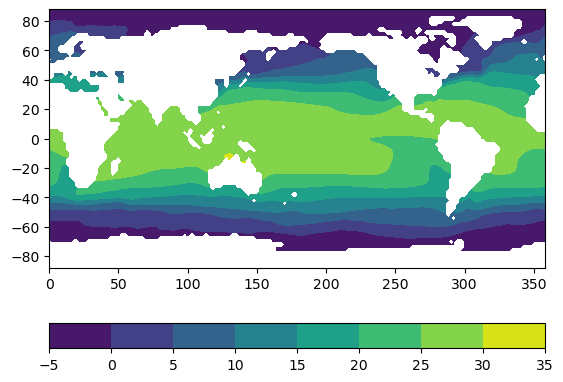

In [31]:
# contourf
fig = plt.figure()
ax = plt.subplot(111)
sst_plot = ax.contourf(X_sst, Y_sst, sst)
fig.colorbar(sst_plot, orientation='horizontal', ax=ax)
plt.show()

Like contour plots, mesh plots are also 2-dimensional plots that display 3-dimensions of information using x, y, coordinates and z for a color scale. However, mesh plots do not perform any smoothing and display data as-is on a regular grid. However, since many satellite datasets are swath-based, irregularly spaced data needs to be re-gridded in order to display it as a mesh grid. In the code block below, let’s compare how the sst data looks using pcolormesh command with the previous example using contour. The code below has no other changes to the plot other than the call to the plot type.

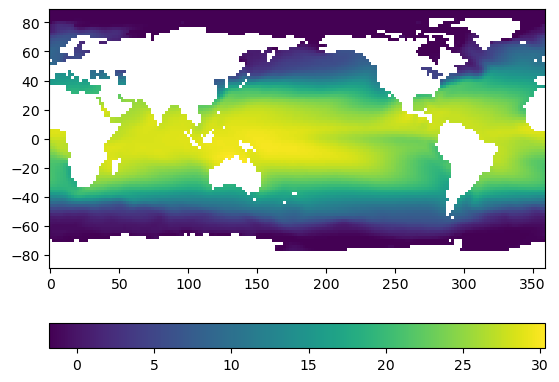

In [32]:
#pcolormesh
fig = plt.figure()
ax = plt.subplot(111)
sst_plot = ax.pcolormesh(X_sst, Y_sst, sst, shading='auto')
fig.colorbar(sst_plot, orientation='horizontal')
plt.show()

You might notice that there is more structure in the mesh plot than the filled contour. This is useful if you wish to examine fine structure and patterns.

---
**Exercise 2**: Plot 3-dimensional data

Plot *AOD_lat*, *AOD_lon*, and *AOD_500* (which we imported from the "JRR-AOD_v2r3_j01_..." netCDF file as:

1. Check the dimensions for all variables using *.shape*.
2. Do you need to generate a meshgrid with *np.meshgrid()*?
3. Create a contour plot

---
**Solution:**

## Adding Maps to datasets

The package Cartopy add mapping functionality to Matplotlib. Cartopy provides an interface to obtain continent, country, and feature details to overlay onto your plot. Furthermore, Cartopy also enables you to convert your data from one map projection to another, which requires a cartesian coordinate system to the map coordinates. Matplotlib natively supports the six mathematical and map projections (Aitoff, Hammer, Lambert, Mollweide, polar, and rectilinear) and combined with Cartopy, data can be transformed to a total of 33 possible projections.

In [33]:
from cartopy import crs as ccrs

Just like before, we need to convert the 1D lat and lon coordinates to 2D using meshgrid. We can check the shape to ensure all variables have the same dimensions.

In [34]:
gfs_temp = temp.values
gfs_x, gfs_y = np.meshgrid(gfs_lon, gfs_lat)

gfs_x.shape, gfs_y.shape, gfs_temp.shape

((181, 360), (181, 360), (181, 360))

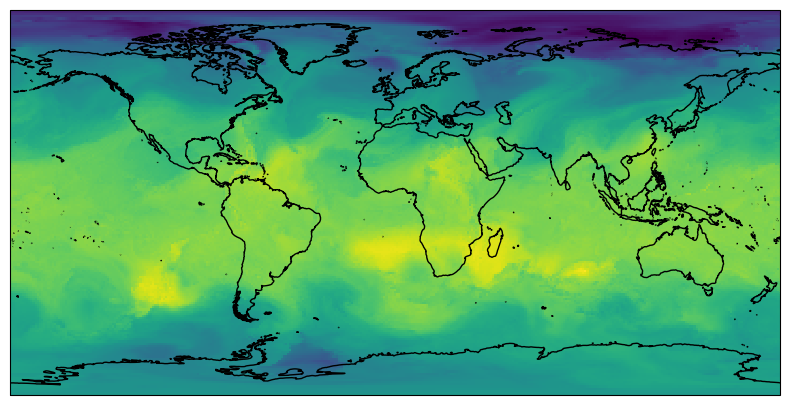

In [35]:
fig = plt.figure(figsize=[10,5])
ax = plt.subplot(projection=ccrs.PlateCarree())

ax.pcolormesh(gfs_x, gfs_y, gfs_temp)

ax.coastlines('50m')
plt.show()

In the next example, you can switch from Plate Carrée to Orthographic. You must define the projection twice, once in the *projection=* keyword and again in the *transform=*. In the *plt.subplot* line, you must define the to coordinates (*ccrs.Orthographic*), which is how you want to axes to show the data.  In the ax.scatter line, you use the transform keyword argument in scatter to define the from coordinates (Plate Carrée), which are the coordinates that the data formatted for.

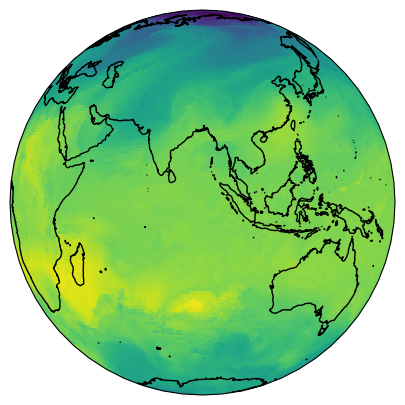

In [36]:
fig = plt.figure(figsize=[10,5])
ax = plt.subplot(projection=ccrs.Orthographic(90, 0))

ax.pcolormesh(gfs_x, gfs_y, gfs_temp, transform=ccrs.PlateCarree())

ax.coastlines('50m')
plt.show()

---
**Exercise 3** Adding maps to plots

Using *sst_lat*, *AOD_lon*, and *AOD_550* (which we imported from the "JRR-AOD_v2r3_j01_..." netCDF file)

1. Create a *pcolormesh* plot
2. Add the coastlines to a standard Plate Caree plot using *projection=* option.

---
**Solution**:

## Summary:

You learned:

* How to import scientific data formats, like netCDF and GRIB2
* Worked with arrays and lists
* How to create a simple maps

Next lesson:
* Create new imagery by combining single channels
* Perform basic gridding operations to regularly spaced data
* Save data into text and binary files, and plots as images